In [1]:
%load_ext autoreload
%autoreload 2

import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-03-07 17:36:22,130 | INFO     |: info
2024-03-07 17:36:22,133 | WARNING  |: warning
2024-03-07 17:36:22,134 | ERROR    |: error
2024-03-07 17:36:22,134 | CRITICAL |: critical


In [4]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-07 17:36:47,496 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-03-07 17:36:53,513 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\Webpage\FR-2024\code\Lab2\Lab2\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [7]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Exception: Not connected to a BLE device

In [5]:
raw_message=[]
#add more arrays if needed
num = []
time = [] #in seconds
xAcc = [] 
yAcc = []
zAcc = []
xGyr = [] 
yGyr = []
zGyr = []
def notification_handler(uuid, byte_array):
    global time,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    # Extracts the time portion in seconds from the byte array
    message = ble.bytearray_to_string(byte_array)
    readings = message.split('|')
    num.clear()
    for reading in readings:
        label, value = reading.split(':')
        num.append(float(value))
    #Add more arrays if needed
    time.append(num[0]/1000)
    xAcc.append(num[1])
    yAcc.append(num[2])
    zAcc.append(num[3])
    xGyr.append(num[4])
    yGyr.append(num[5])
    zGyr.append(num[6])
    #print(f"Time: {float(num[0])/1000}s; xAcc: {num[1]}; yAcc: {num[2]}; xAcc: {num[1]}; xAcc: {num[1]}; xAcc: {num[1]}; xAcc: {num[1]}")

In [6]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [7]:
ble.send_command(CMD.GET_IMU_DATA, "")

In [20]:
print(f"It takes: {round(time[-1]-time[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(time)/(time[-1]-time[0]))} samples/s.")

It takes: 1.629s to collect data.
Sample rate is about 290 samples/s.


In [21]:
for i in range(len(time)):
    print(f"Time: {time[i]}s; xAcc: {xAcc[i]}; yAcc: {yAcc[i]}; zAcc: {zAcc[i]}; xGyr: {xGyr[i]}; yGyr: {yGyr[i]}; zGyr: {zGyr[i]}")

Time: 39.677s; xAcc: -943.359; yAcc: -108.886; zAcc: 507.324; xGyr: 4.45; yGyr: 21.442; zGyr: 7.755
Time: 39.68s; xAcc: -969.726; yAcc: -107.421; zAcc: 493.652; xGyr: 4.847; yGyr: 22.824; zGyr: 11.541
Time: 39.682s; xAcc: -984.863; yAcc: -106.445; zAcc: 456.542; xGyr: 6.412; yGyr: 25.328; zGyr: 7.53
Time: 39.685s; xAcc: -993.652; yAcc: -86.425; zAcc: 501.464; xGyr: 4.839; yGyr: 30.152; zGyr: 6.893
Time: 39.688s; xAcc: -994.628; yAcc: -57.128; zAcc: 536.621; xGyr: 2.786; yGyr: 29.755; zGyr: 8.129
Time: 39.695s; xAcc: -995.605; yAcc: -55.664; zAcc: 500.976; xGyr: 4.91; yGyr: 27.122; zGyr: 10.618
Time: 39.697s; xAcc: -1058.593; yAcc: -62.5; zAcc: 488.281; xGyr: 7.404; yGyr: 27.229; zGyr: 13.167
Time: 39.7s; xAcc: -1068.847; yAcc: -59.57; zAcc: 494.14; xGyr: 7.129; yGyr: 29.732; zGyr: 12.641
Time: 39.706s; xAcc: -1063.476; yAcc: -40.39; zAcc: 548.339; xGyr: 3.9; yGyr: 30.969; zGyr: 15.748
Time: 39.708s; xAcc: -1128.417; yAcc: -57.617; zAcc: 515.136; xGyr: 5.236; yGyr: 29.396; zGyr: 20.801


In [22]:
ble.stop_notify(ble.uuid['RX_STRING'])

Exception: Not connected to a BLE device

In [10]:
# Disconnect
ble.disconnect()

2024-03-07 16:45:34,682 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


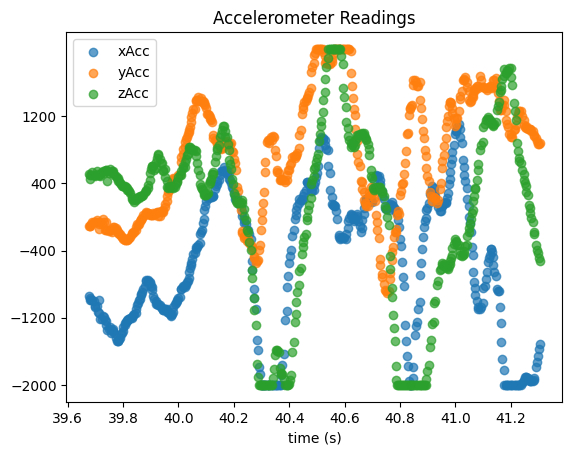

In [24]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();